# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alice springs
Processing Record 2 of Set 1 | rio tuba
Processing Record 3 of Set 1 | broken hill
Processing Record 4 of Set 1 | fale old settlement
Processing Record 5 of Set 1 | badiyah
Processing Record 6 of Set 1 | tessaoua
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | plastun
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | lata
Processing Record 13 of Set 1 | port macquarie
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | bagepalli
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | igarka
Processing Record 22

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alice springs,-23.7000,133.8833,21.75,33,75,4.63,AU,1692213579
1,rio tuba,8.5061,117.4317,26.92,83,100,3.44,PH,1692213818
2,broken hill,-31.9500,141.4333,12.67,54,99,4.43,AU,1692213516
3,fale old settlement,-9.3852,-171.2468,28.32,73,99,8.07,TK,1692213533
4,badiyah,22.4500,58.8000,27.00,65,6,4.30,OM,1692213819


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data, cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data, cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,21.75,33,75,4.63,AU,1692213579
1,rio tuba,8.5061,117.4317,26.92,83,100,3.44,PH,1692213818
2,broken hill,-31.9500,141.4333,12.67,54,99,4.43,AU,1692213516
3,fale old settlement,-9.3852,-171.2468,28.32,73,99,8.07,TK,1692213533
4,badiyah,22.4500,58.8000,27.00,65,6,4.30,OM,1692213819


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

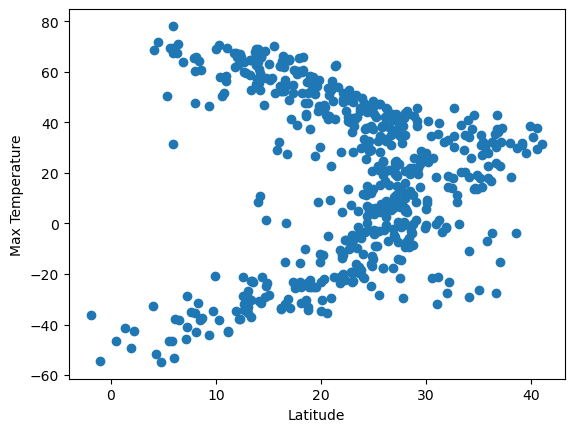

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data, Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

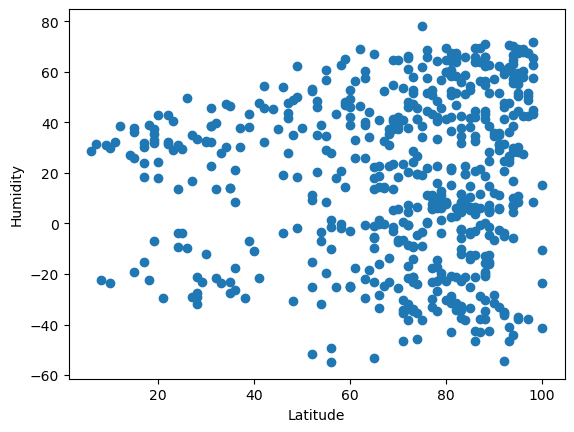

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data, Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

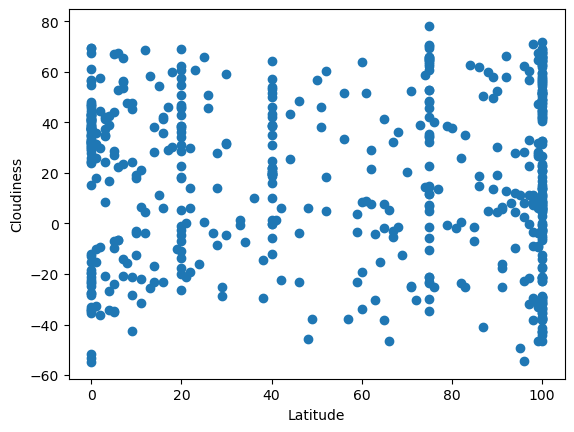

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data, Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

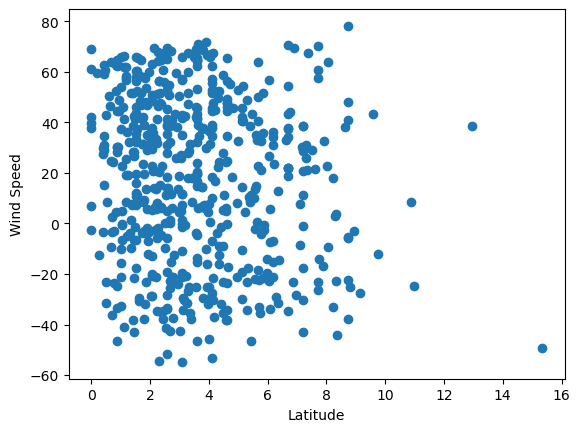

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data, Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearson(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rio tuba,8.5061,117.4317,26.92,83,100,3.44,PH,1692213818
4,badiyah,22.4500,58.8000,27.00,65,6,4.30,OM,1692213819
5,tessaoua,13.7574,7.9874,34.82,32,77,1.86,NE,1692213819
6,yellowknife,62.4560,-114.3525,21.34,49,20,4.12,CA,1692213809
7,plastun,44.7561,136.2939,20.16,98,100,4.22,RU,1692213820


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,21.75,33,75,4.63,AU,1692213579
2,broken hill,-31.9500,141.4333,12.67,54,99,4.43,AU,1692213516
3,fale old settlement,-9.3852,-171.2468,28.32,73,99,8.07,TK,1692213533
8,bredasdorp,-34.5322,20.0403,9.74,88,0,2.24,ZA,1692213550
12,port macquarie,-31.4333,152.9167,8.27,90,11,3.26,AU,1692213821


###  Temperature vs. Latitude Linear Regression Plot

The r-values is: -0.6277501243571374


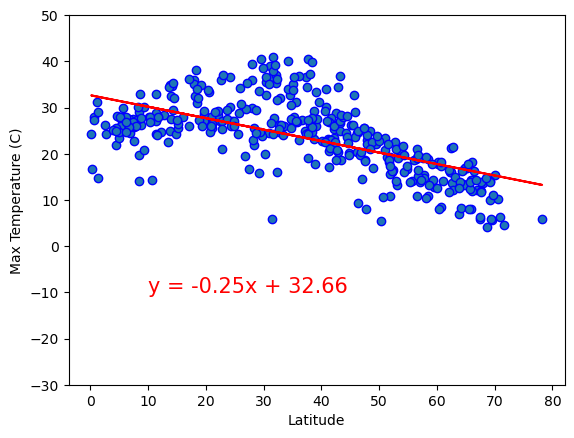

In [25]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


plt.ylim(-30, 50)

plt.grid(False)
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

The r-values is: 0.7763858192218338


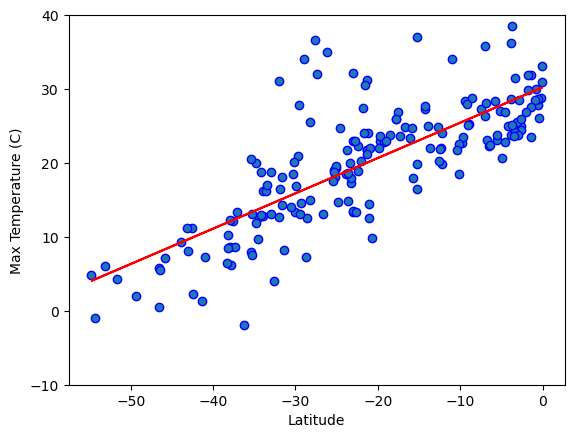

In [26]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


plt.ylim(-10, 40)

plt.grid(False)
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

**Discussion about the linear relationship:** The max temperature has strong relationship with the latitude. The temperature gets higher when the location is closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-values is: 0.1057967836648499


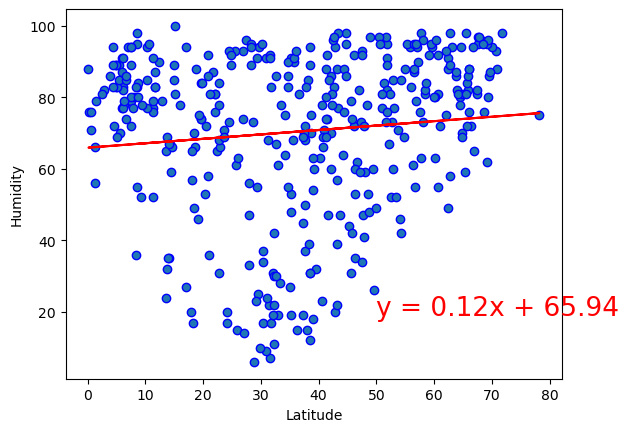

In [27]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(False)
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(50,19),fontsize=19,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

The r-values is: -0.13258340605695226


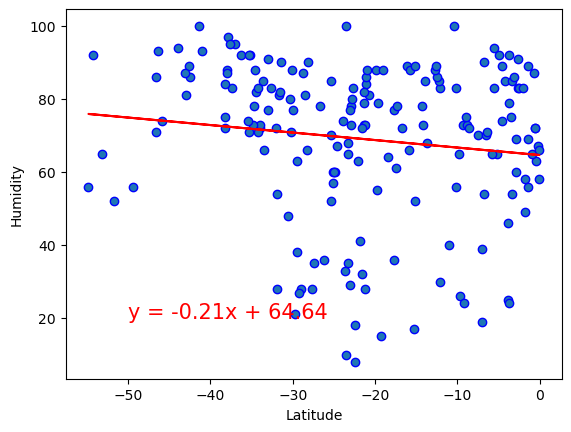

In [28]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(False)
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

**Discussion about the linear relationship:** The humidity does not show a relationship with the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-values is: -0.02536758831198754


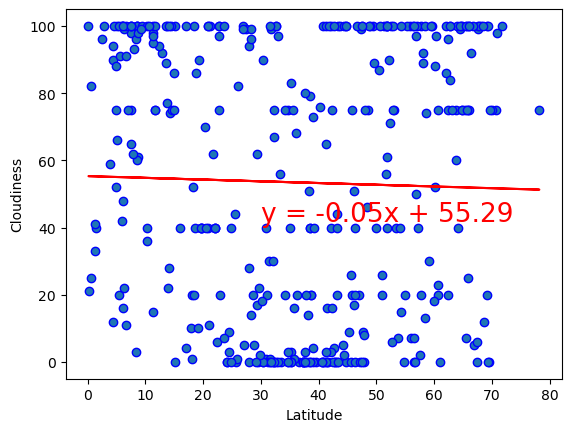

In [29]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid(False)
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(30,42),fontsize=19,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

The r-values is: -0.06274017252274139


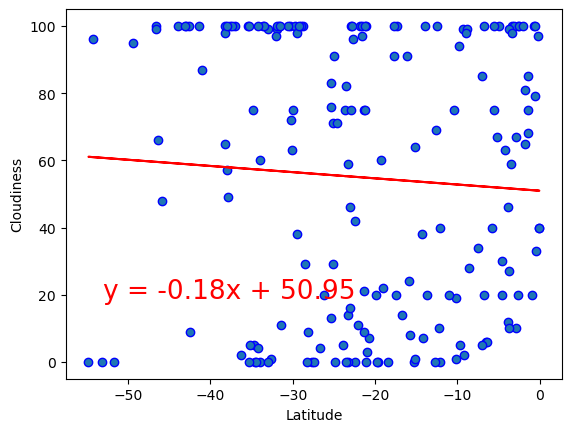

In [30]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid(False)
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(-53,19),fontsize=19,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

**Discussion about the linear relationship:** The cloudiness shows as decreasing as the city gets closer to the equator. The cloudiness is also in line with the max temperature. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-values is: -0.06663490831477555


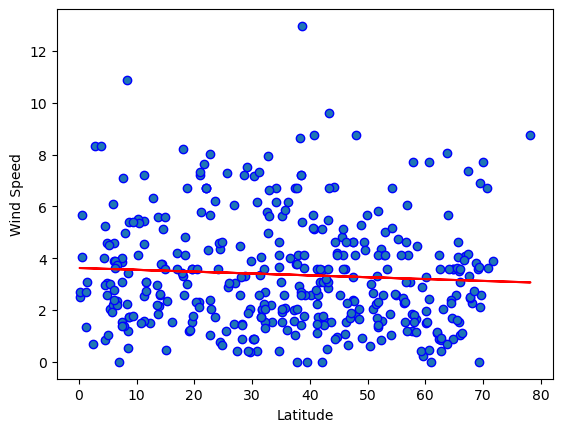

In [31]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid(False)
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(30,42),fontsize=19,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

The r-values is: -0.09623543481023415


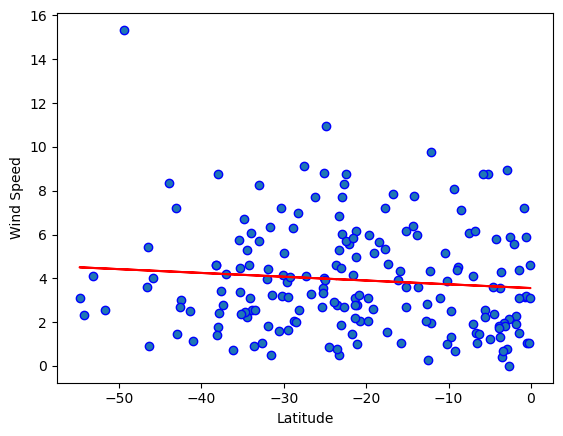

In [32]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolor="Blue", alpha=1)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid(False)
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
r_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,r_values,"r-")
plt.annotate(line_eq,(30,42),fontsize=19,color="red")
print("The r-values is: "+ str(rvalue))
plt.show()

**Discussion about the linear relationship:** The wind speed does not show a strong relationship with the city's latitude.